## Wine quality - Multiclass

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import f1_score,auc, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/winequality.csv

--2022-06-28 08:09:53--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/winequality.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.158
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/csv]
Saving to: ‘winequality.csv’

winequality.csv     100%[===================>]  98.58K   625KB/s    in 0.2s    

2022-06-28 08:09:54 (625 KB/s) - ‘winequality.csv’ saved [100951/100951]



In [3]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# number of rows & columns in the dataset
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


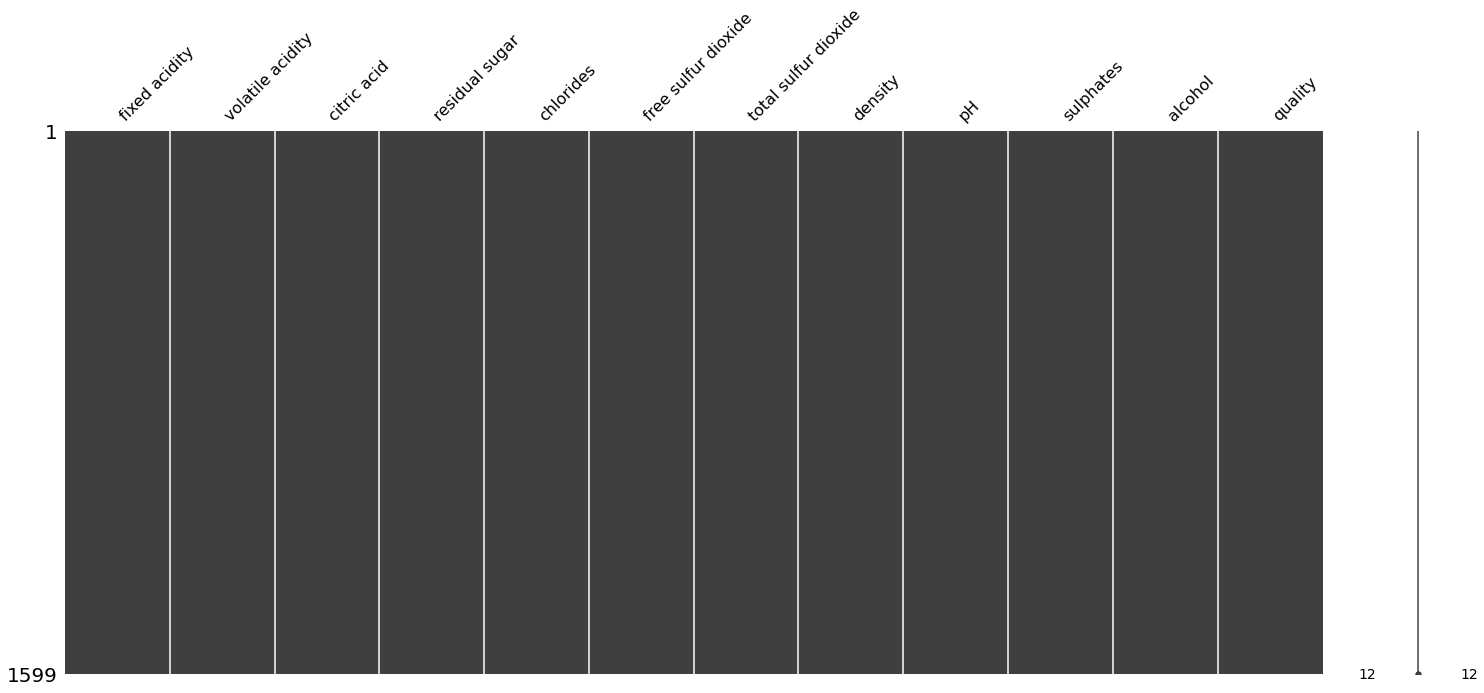

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
# checking for missing values
#df.isnull().sum().sum()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [8]:
# statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


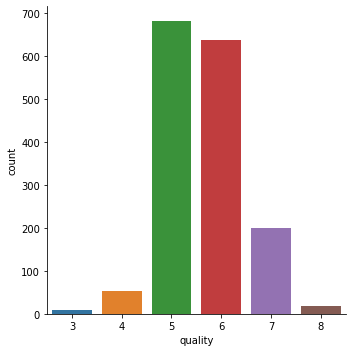

In [9]:
import seaborn as sns
# number of values for each quality
sns.catplot(x='quality', data = df, kind = 'count')

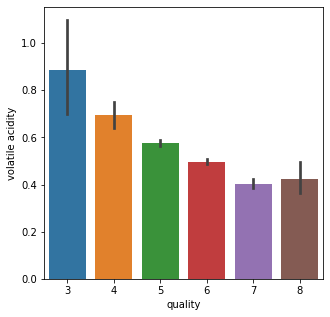

In [10]:
# volatile acidity vs Quality
plt.figure(figsize=(5,5))

sns.barplot(x='quality', y = 'volatile acidity', data = df)

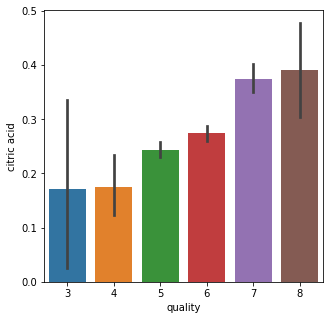

In [11]:
# citric acid vs Quality
plt.figure(figsize=(5,5))

sns.barplot(x='quality', y = 'citric acid', data = df)

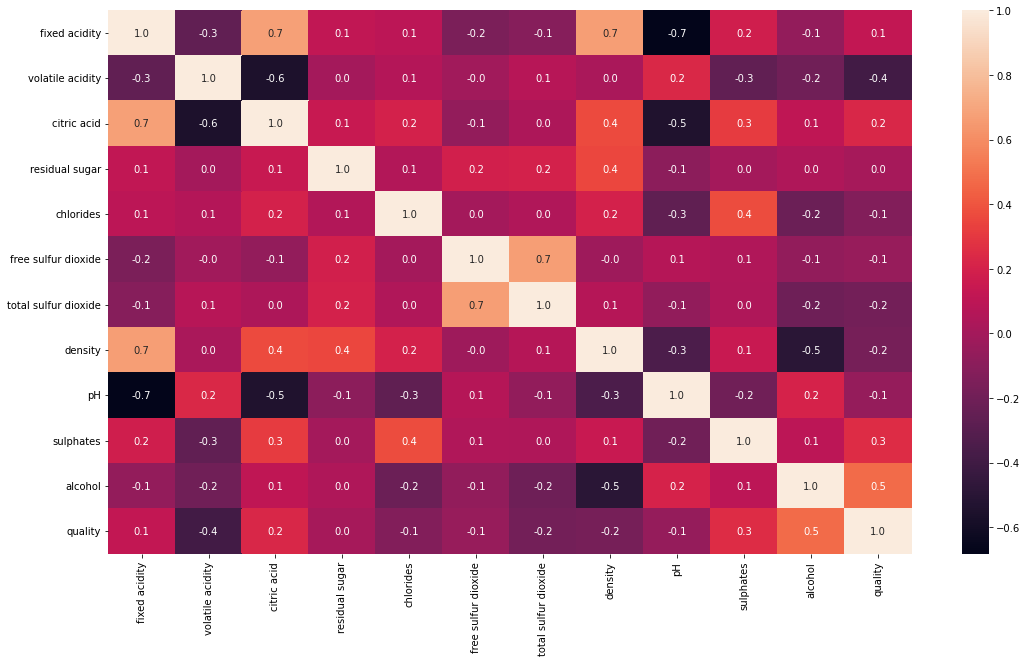

In [12]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(18,10))

sns.heatmap(df.corr(), fmt = '.1f', annot = True);

In [13]:
sns.pairplot(df,hue='quality');

Output hidden; open in https://colab.research.google.com to view.

In [14]:
import plotly.express as px

fig0 = px.parallel_coordinates(df, color="quality",
               dimensions=[ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                            'pH', 'sulphates', 'alcohol',
                             ],
               color_continuous_scale=px.colors.diverging.Tealrose,
               title = 'PCP High Quality Wines  Without Reordering')
fig0.show()

In [15]:
# separate the data and Label
X = df.drop('quality',axis=1)
y=df['quality']

In [16]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
X_ = standardized_data
X_

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [17]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Train & Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, 
                                                    test_size=0.2,
                                                    random_state=667
                                                    )

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
model_collection = []

model_collection.append(LogisticRegression(solver='liblinear'))
model_collection.append(RandomForestClassifier())
model_collection.append(SVC())
model_collection.append(KNeighborsClassifier())
model_collection.append(DecisionTreeClassifier())
model_collection.append(GaussianNB())

In [22]:
model_list = ['Logistic_Regression','Random_Forest','SVM','KNN','DecionTree','Naive_Bayes']
acc_list = []
f1_list = []
cm_list = []

for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    f1_list.append(f1_score(y_test,y_pred,average='macro'))
    cm_list.append(confusion_matrix(y_test,y_pred))

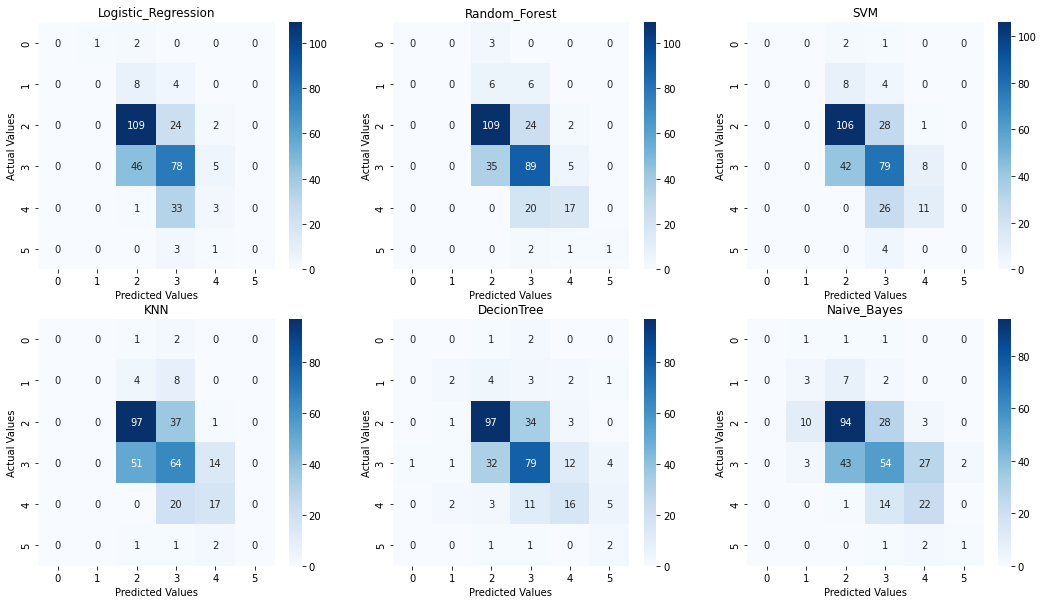

In [23]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True,cmap='Blues',fmt='.3g')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [24]:
for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test,model.predict(X_test)))

LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.66      0.81      0.72       135
           6       0.55      0.60      0.58       129
           7       0.27      0.08      0.12        37
           8       0.00      0.00      0.00         4

    accuracy                           0.59       320
   macro avg       0.25      0.25      0.24       320
weighted avg       0.53      0.59      0.55       320

RandomForestClassifier()
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        12
           5       0.72      0.82      0.77       135
           6       0.63      0.67      0.65       129
           7       0.63      0.46      0.53        37
           8       1.00      0.25      0.40         4

    accuracy 

In [25]:
result_df = pd.DataFrame({
                            'Model':model_list,
                            'Accuracy':acc_list,
                            'F1_macro':f1_list
                          })
result_df.sort_values(by=['F1_macro'],ascending=False)

,Model,Accuracy,F1_macro
1,Random_Forest,0.67500,0.394098
4,DecionTree,0.61250,0.375004
5,Naive_Bayes,0.54375,0.352797
2,SVM,0.61250,0.282090
3,KNN,0.55625,0.273429
0,Logistic_Regression,0.59375,0.237483


In [26]:
bestmodel = RandomForestClassifier().fit(X_train,y_train)

In [27]:
input_data = [7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5]

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = bestmodel.predict(input_data_reshaped)
print(prediction[0])

5


## Pipeline

In [28]:
# X = features not standardized
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=667
                                                    )

In [29]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [30]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=8)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, random_state=667))])

In [31]:
input_data = [7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5]

prediction = pipe.predict([input_data])
print(prediction[0])


5


## Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.53       0.685      0.61       0.565      0.595      0.56
 0.63       0.58291457]
mean=0.5947393216080401
std=0.04478492202078106


## Fit to all data

In [33]:
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, random_state=667))])

In [34]:
import joblib
joblib.dump(pipe,'pipe_wine.pkl')

['pipe_wine.pkl']

In [35]:
uploaded_model = joblib.load('pipe_wine.pkl')

uploaded_model.predict([input_data])[0] #

5